In [3]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import SGD , Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn.utils import shuffle


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!unzip "drive/My Drive/AIML Project/handwritten.csv.zip" -d "drive/MyDrive/AIML Project/"

Archive:  drive/My Drive/AIML Project/handwritten.csv.zip
replace drive/MyDrive/AIML Project/A_Z Handwritten Data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: drive/MyDrive/AIML Project/A_Z Handwritten Data.csv  


In [7]:
# Read the data...
data = pd.read_csv(r"drive/MyDrive/AIML Project/A_Z Handwritten Data.csv").astype('float32')

In [8]:
# Split data the X - Our data , and y - the prdict label
X = data.drop('0',axis = 1)
y = data['0']


In [9]:
# Reshaping the data in csv file so that it can be displayed as an image...

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)
train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))



In [10]:

print("Train data shape: ", train_x.shape)
print("Test data shape: ", test_x.shape)


Train data shape:  (297960, 28, 28)
Test data shape:  (74490, 28, 28)


In [2]:

# Dictionary for getting characters from index values...
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}



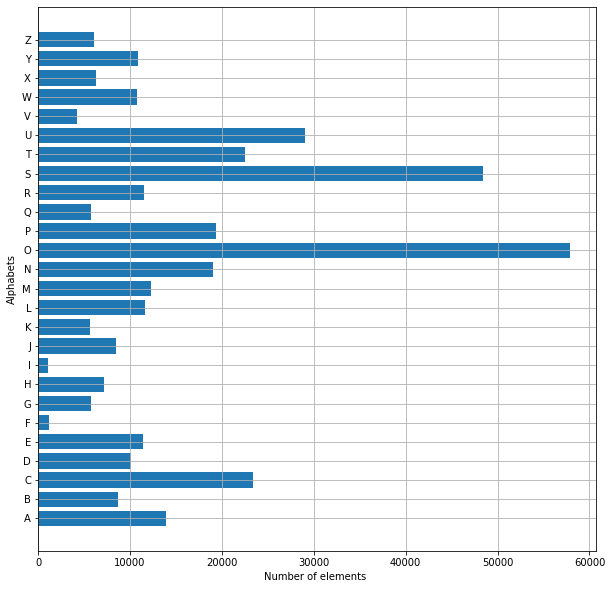

In [12]:
# Plotting the number of alphabets in the dataset...

train_yint = np.int0(y)
count = np.zeros(26, dtype='int')
for i in train_yint:
    count[i] +=1

alphabets = []
for i in word_dict.values():
    alphabets.append(i)

fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, count)

plt.xlabel("Number of elements ")
plt.ylabel("Alphabets")
plt.grid()
plt.show()



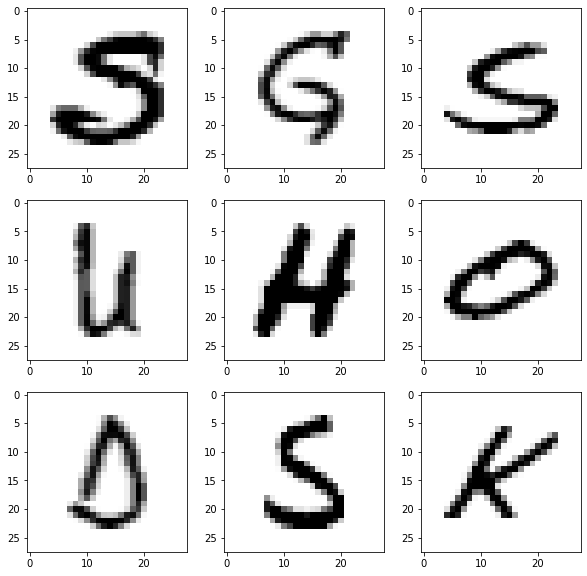

In [13]:
#Shuffling the data ...
shuff = shuffle(train_x[:100])

fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()

for i in range(9):
    axes[i].imshow(np.reshape(shuff[i], (28,28)), cmap="Greys")
plt.show()


In [14]:
#Reshaping the training & test dataset so that it can be put in the model...

train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
print("New shape of train data: ", train_X.shape)

test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print("New shape of train data: ", test_X.shape)


New shape of train data:  (297960, 28, 28, 1)
New shape of train data:  (74490, 28, 28, 1)


In [15]:
# Converting the labels to categorical values...

train_yOHE = to_categorical(train_y, num_classes = 26, dtype='int')
print("New shape of train labels: ", train_yOHE.shape)

test_yOHE = to_categorical(test_y, num_classes = 26, dtype='int')
print("New shape of test labels: ", test_yOHE.shape)



New shape of train labels:  (297960, 26)
New shape of test labels:  (74490, 26)


In [16]:

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))

model.add(Dense(26,activation ="softmax"))


In [18]:

model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')


history = model.fit(train_X, train_yOHE, epochs=1, callbacks=[reduce_lr, early_stop],  validation_data = (test_X,test_yOHE))

model.summary()
model.save(r'model.h5')


9312/9312 [==============================] - 91s 10ms/step - loss: 0.0731 - accuracy: 0.9799 - val_loss: 0.0670 - val_accuracy: 0.9817 - lr: 0.0010
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4

In [19]:
# Displaying the accuracies & losses for train & validation set...

print("The validation accuracy is :", history.history['val_accuracy'])
print("The training accuracy is :", history.history['accuracy'])
print("The validation loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])


The validation accuracy is : [0.981675386428833]
The training accuracy is : [0.9799402356147766]
The validation loss is : [0.06703516840934753]
The training loss is : [0.07312057912349701]


In [20]:
#Making model predictions...

pred = model.predict(test_X[:9])
print(test_X.shape)



(74490, 28, 28, 1)


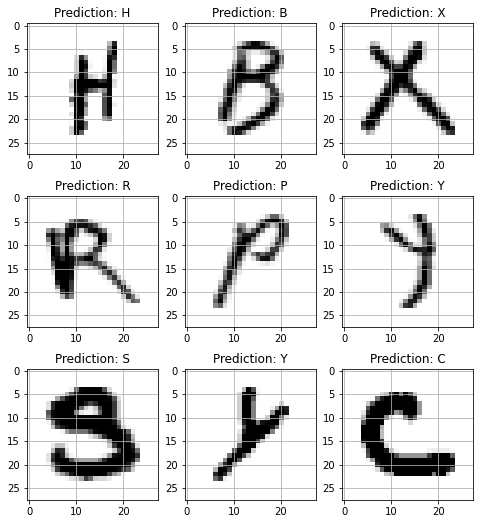

In [21]:
# Displaying some of the test images & their predicted labels...

fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(test_X[i], (28,28))
    ax.imshow(img, cmap="Greys")
    pred = word_dict[np.argmax(test_yOHE[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()



In [26]:
# from google.colab.patches import cv2_imshow

In [2]:
import joblib

In [ ]:
# loaded_model = joblib.load('handwritten-character-recognition-code/best-trained-model(.h5-file)/model_hand.h5')

In [5]:

img = cv2.imread(r'/content/stat1example.jpg')
img_copy = img.copy()

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (400,440))

img_copy = cv2.GaussianBlur(img_copy, (7,7), 0)
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)

img_final = cv2.resize(img_thresh, (28,28))
img_final =np.reshape(img_final, (1,28,28,1))


img_pred = word_dict[np.argmax(model.predict(img_final))]

cv2.putText(img, "Handwritten Recognition (AIML)", (20,25), cv2.FONT_HERSHEY_TRIPLEX, 0.7, color = (0,0,230))
cv2.putText(img, "Prediction: " + img_pred, (20,410), cv2.FONT_HERSHEY_DUPLEX, 1.3, color = (255,0,30))
cv2.imshow(img)


while (1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
cv2.destroyAllWindows()



AttributeError: 'NoneType' object has no attribute 'copy'

In [9]:
new_model = tf.keras.models.load_model('../Saved Model/model_hand.h5')

In [10]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 2, 2, 128)       

In [11]:
# Prediction on external image...
def predict(image):
  img = cv2.imread(image)
  img_copy = img.copy()

  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = cv2.resize(img, (400,440))

  img_copy = cv2.GaussianBlur(img_copy, (7,7), 0)
  img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
  _, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)

  img_final = cv2.resize(img_thresh, (28,28))
  img_final =np.reshape(img_final, (1,28,28,1))


  img_pred = word_dict[np.argmax(new_model.predict(img_final))]

  cv2.putText(img, "Handwritten Recognition (AIML) ", (20,25), cv2.FONT_HERSHEY_TRIPLEX, 0.7, color = (0,0,230))
  cv2.putText(img, "Prediction: " + img_pred, (20,410), cv2.FONT_HERSHEY_DUPLEX, 1.3, color = (255,0,30))
  cv2.imshow("Test",img)


  while (1):
      k = cv2.waitKey(1) & 0xFF
      if k == 27:
          break
  cv2.destroyAllWindows()
  


In [12]:
predict("../Images/a.jpg")

KeyboardInterrupt: 

In [13]:
predict("../Images/k.jpg")

KeyboardInterrupt: 